In [1]:
import os
import geopandas as gpd

import pandas as pd
import requests

In [2]:
#geo pandas projections!
#https://geopandas.org/en/stable/docs/user_guide/projections.html

#lonlat projection code
#EPSG:4326

In [3]:
path_to_data = os.path.join("..","data", "geo")
geojson_filename = "uk_dno_regions_2024.geojson"
geojson_filename = "national_grid_dno_regions_2024.geojson"
filepath = os.path.join(path_to_data, geojson_filename)

In [4]:
! ls {path_to_data}

carbon_intensity_regional.png		uk_dno_regions_2024.geojson
national_grid_dno_regions_2024.geojson	uk_dno_regions_lonlat.geojson


In [5]:
uk_regions = gpd.read_file(filepath)

In [6]:
uk_regions.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [27]:
lonlat_EPSG = 4326
print("crs before: ", uk_regions.crs)
uk_regions_lonlat = uk_regions.to_crs(epsg=lonlat_EPSG)
# uk_regions_lonlat.set_crs(epsg=lonlat_EPSG)
print("crs after: ", uk_regions_lonlat.crs)

crs b4:  EPSG:27700
crs after:  EPSG:4326


In [28]:
filename_out = "uk_dno_regions_lonlat.geojson"
filepath_out = os.path.join(path_to_data, filename_out)
print(filepath_out)

../data/geo/uk_dno_regions_lonlat.geojson


In [29]:
# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_file.html
uk_regions_lonlat.to_file(filepath_out, driver='GeoJSON')  

In [36]:
type(uk_regions)

geopandas.geodataframe.GeoDataFrame

In [41]:
def convert_geodf_to_lonlat(geodf, lonlat_EPSG = 4326):
    """ projects the co-ordinates to lonlat
        GeoPandas projections
        https://geopandas.org/en/stable/docs/user_guide/projections.html
    """
    print("Co-ordinate Reference System before: ", geodf.crs)
    geodf_lonlat = geodf.to_crs(epsg=lonlat_EPSG)
    print("Co-ordinate Reference System after: ", geodf_lonlat.crs)
    return geodf_lonlat

test_df = convert_geodf_to_lonlat(test_df)
test_df

Co-ordinate Reference System before:  EPSG:4326
Co-ordinate Reference System after:  EPSG:4326


ID Name   DNO                                  Area  \
0    1   _P  SSEN                        North Scotland   
1    2   _N  SPEN                        South Scotland   
2    3   _G  ENWL                    North West England   
3    4   _F   NPG                    North East England   
4    5   _M   NPG                             Yorkshire   
5    6   _D  SPEN  North Wales, Merseyside and Cheshire   
6    7   _K  NGED                           South Wales   
7    8   _E  NGED                         West Midlands   
8    9   _B  NGED                         East Midlands   
9   10   _A  UKPN                          East England   
10  11   _L  NGED                    South West England   
11  12   _H  SSEN                         South England   
12  13   _C  UKPN                                London   
13  14   _J  UKPN                    South East England   

                                      DNO_Full  \
0   Scottish and Southern Electricity Networks   
1                           SP Energy Networks   
2                       Electricity North West   
3                           Northern Powergrid   
4                           Northern Powergrid   
5                           SP Energy Networks   
6       National Grid Electricity Distribution   
7       National Grid Electricity Distribution   
8       National Grid Electricity Distribution   
9                            UK Power Networks   
10      National Grid Electricity Distribution   
11  Scottish and Southern Electricity Networks   
12                           UK Power Networks   
13                           UK Power Networks   

                                             geometry  
0   MULTIPOLYGON (((-5.1162 55.2412, -5.11948 55.2...  
1   MULTIPOLYGON (((-4.7016 54.66506, -4.70051 54....  
2   MULTIPOLYGON (((-2.66161 55.14636, -2.65693 55...  
3   MULTIPOLYGON (((-1.59801 55.62683, -1.59862 55...  
4   MULTIPOLYGON (((-2.22088 54.25104, -2.21629 54...  
5   MULTIPOLYGON (((-4.255 53.38794, -4.25559 53.3...  
6   MULTIPOLYGON (((-3.11356 51.3757, -3.11456 51....  
7   MULTIPOLYGON (((-1.959 53.21662, -1.95676 53.2...  
8   MULTIPOLYGON (((0.26687 52.8124, 0.26697 52.81...  
9   MULTIPOLYGON (((0.8747 51.51298, 0.87653 51.51...  
10  MULTIPOLYGON (((-6.39837 49.86359, -6.39904 49...  
11  MULTIPOLYGON (((-1.11305 52.01648, -1.1116 52....  
12  MULTIPOLYGON (((-0.24421 51.48844, -0.24511 51...  
13  MULTIPOLYGON (((0.56584 51.48862, 0.57281 51.4...

# copy of funcs to generate regional data

In [10]:
def get_api_regional_response():
    url = "https://api.carbonintensity.org.uk/regional"
    response = requests.get(url).json()
    # print(response)
    regions = response['data'][0]['regions']
    return regions
def regional_response_to_df(regions):
    """
        parse API response into desired df, with columns:
        'id', 'dno_region', 'api_name', 'intensity_forecast', 'intensity_index',
       'biomass_perc', 'coal_perc', 'imports_perc', 'gas_perc', 'nuclear_perc',
       'other_perc', 'hydro_perc', 'solar_perc', 'wind_perc'
    """
    # regions = response_regional['data'][0]['regions']

    rows = []
    for region in regions:
        region_id = region["regionid"]
        dno_region = region["dnoregion"]
        name = region["shortname"]
        intensity_forecast = region["intensity"]["forecast"]
        intensity_index = region["intensity"]["index"]

        row_dict = {
            "id" : region_id,
            "dno_region" : dno_region,
            "api_name" : name,
            "carbon_intensity_forecast" : intensity_forecast,
            "carbon_intensity_index" : intensity_index
        }

        for fuel in region["generationmix"]:
            fuel_name = fuel["fuel"]
            fuel_percentage = fuel["perc"]
            row_dict[fuel_name+"_perc"] = fuel_percentage

        rows.append(row_dict)

    return pd.DataFrame(rows)

def get_api_regions_as_df():
    regions = get_api_regional_response()
    regions_df = regional_response_to_df(regions)
    return regions_df

In [30]:
def generate_geodf_with_live_data(geo_filename = "uk_dno_regions_2024.geojson"):
    #firstly get the geopandas with regions, to be completed with live data
    
    geojson_filename = geo_filename
    filepath = os.path.join(path_to_data, geojson_filename)
    uk_regions = gpd.read_file(filepath)
    print("UK regions read from:" , filepath)
    #get the live data
    uk_live_df = get_api_regions_as_df()

    cols_to_drop = ["Name", "DNO","DNO_Full", "id", "api_name", "dno_region"]

    #merge them on their respective id columns
    return uk_regions.merge(uk_live_df, how="inner", left_on="ID", right_on="id").drop(columns=cols_to_drop)

carbon_regions = generate_geodf_with_live_data(filename_out)

UK regions read from: ../data/geo/uk_dno_regions_lonlat.geojson


In [31]:
carbon_regions

ID                                  Area  \
0    1                        North Scotland   
1    2                        South Scotland   
2    3                    North West England   
3    4                    North East England   
4    5                             Yorkshire   
5    6  North Wales, Merseyside and Cheshire   
6    7                           South Wales   
7    8                         West Midlands   
8    9                         East Midlands   
9   10                          East England   
10  11                    South West England   
11  12                         South England   
12  13                                London   
13  14                    South East England   

                                             geometry  \
0   MULTIPOLYGON (((-5.1162 55.2412, -5.11948 55.2...   
1   MULTIPOLYGON (((-4.7016 54.66506, -4.70051 54....   
2   MULTIPOLYGON (((-2.66161 55.14636, -2.65693 55...   
3   MULTIPOLYGON (((-1.59801 55.62683, -1.59862 55...   
4   MULTIPOLYGON (((-2.22088 54.25104, -2.21629 54...   
5   MULTIPOLYGON (((-4.255 53.38794, -4.25559 53.3...   
6   MULTIPOLYGON (((-3.11356 51.3757, -3.11456 51....   
7   MULTIPOLYGON (((-1.959 53.21662, -1.95676 53.2...   
8   MULTIPOLYGON (((0.26687 52.8124, 0.26697 52.81...   
9   MULTIPOLYGON (((0.8747 51.51298, 0.87653 51.51...   
10  MULTIPOLYGON (((-6.39837 49.86359, -6.39904 49...   
11  MULTIPOLYGON (((-1.11305 52.01648, -1.1116 52....   
12  MULTIPOLYGON (((-0.24421 51.48844, -0.24511 51...   
13  MULTIPOLYGON (((0.56584 51.48862, 0.57281 51.4...   

    carbon_intensity_forecast carbon_intensity_index  biomass_perc  coal_perc  \
0                           0               very low           0.0          0   
1                          13               very low           1.6          0   
2                          26               very low           4.6          0   
3                          14               very low           8.5          0   
4                         106                    low          30.9          0   
5                          18               very low           2.3          0   
6                         162               moderate           0.4          0   
7                          87                    low           3.6          0   
8                         146               moderate           6.0          0   
9                          48                    low           0.0          0   
10                        139               moderate           0.0          0   
11                        100                    low           0.0          0   
12                         58                    low           0.0          0   
13                         62                    low           0.0          0   

    imports_perc  gas_perc  nuclear_perc  other_perc  hydro_perc  solar_perc  \
0            0.0       0.0           0.0           0         6.0         0.0   
1            0.5       2.7          22.8           0         3.5         1.9   
2           12.7       5.0          56.8           0         0.6         1.7   
3           64.0       0.0          23.7           0         0.0         2.3   
4            4.8      17.4           1.9           0         0.0         4.1   
5            5.3       3.8          29.8           0         3.5        11.0   
6            2.0      40.9           2.8           0         0.1        29.3   
7           16.4      20.4          21.1           0         0.5        12.7   
8            1.8      35.1           5.4           0         0.0        13.4   
9            3.9      11.9          24.0           0         0.0        14.0   
10           6.1      35.2           0.1           0         0.0        49.9   
11          48.0      23.4           0.4           0         0.1        19.7   
12          41.1      12.6           6.9           0         0.2         8.4   
13          56.3      12.9           0.0           0         0.3         6.1   

    wind_p

# plotly

In [12]:
import plotly.express as px

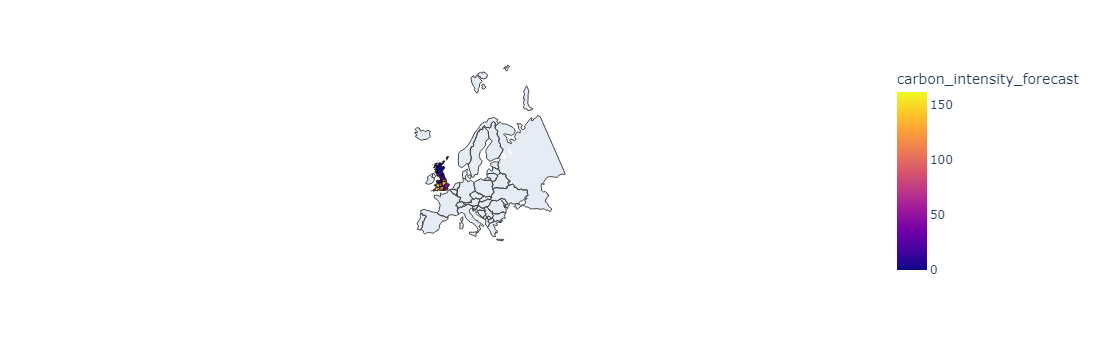

In [35]:
fig = px.choropleth(carbon_regions,
                   geojson=carbon_regions,
                    # geojson=carbon_regions.to_geo_dict(),
                    # geojson=geo_filepath,
                   locations="Region",
                    # locationmode="ISO-3",
                   color="carbon_intensity_forecast",
                    featureidkey="properties.Region",
                   # projection="mercator",
                    scope="europe",
                   )
# fig.update_geos(fitbounds="geojson", visible=True)
fig.show()